# ML - scikit learn

# Submitted by:
<br>Prottoy Kumar Prodhan Joy
<br>Department of Statistics 
<br>University of Chittagong, Chittagong, Bangladesh

#### Objectives:
- Supervised Learning: Linear Regression
- Heat map
- Accuracy metric in Regression problem


**Dataset Source**

https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

**Import required Libraries**

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
# read the csv file 
df=pd.read_csv('ford.csv')
# check random 5 rows
display(df.sample(5))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
4621,Fiesta,2018,10597,Manual,11224,Petrol,65.7,1.0
187,Focus,2017,14998,Manual,32511,Petrol,41.5,2.0
12015,Fiesta,2019,13690,Manual,8514,Petrol,56.5,1.0
5865,Fiesta,2017,9998,Manual,17105,Petrol,65.7,1.0
8659,Fiesta,2018,11500,Manual,5505,Petrol,65.7,1.0


In [4]:
# find the number of rows and columns present in the dataframe
df.shape

(17964, 8)

In [5]:
# check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


So, there are 8 columns. Among them price is the target variable and others are feature variables.

In [6]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')

**Correlation plot:**

In [7]:
df.corr()

,year,price,mileage,mpg,engineSize
year,1.000000,0.645450,-0.718751,-0.021489,-0.139217
price,0.645450,1.000000,-0.530678,-0.346564,0.411181
mileage,-0.718751,-0.530678,1.000000,0.120227,0.215007
mpg,-0.021489,-0.346564,0.120227,1.000000,-0.260534
engineSize,-0.139217,0.411181,0.215007,-0.260534,1.000000


<AxesSubplot:>

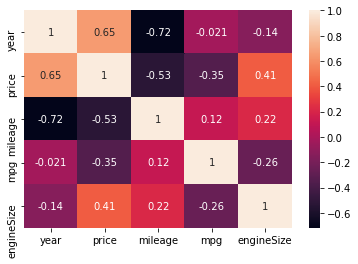

In [8]:
sns.heatmap(df.corr(),annot=True)

**Separating the numeric features and target variable**

In [9]:
# Here 'price' is the target variable
# And, 'year', 'mileage', 'mpg', 'engineSize' are the numeric feature variables
X = df[['year', 'mileage', 'mpg', 'engineSize']]
y = df[['price']]

print(X.shape, y.shape)

(17964, 4) (17964, 1)


In [10]:
# check first 5 rows of the 'X' dataframe
display(X.head(5))

,year,mileage,mpg,engineSize
0,2017,15944,57.7,1.0
1,2018,9083,57.7,1.0
2,2017,12456,57.7,1.0
3,2019,10460,40.3,1.5
4,2019,1482,48.7,1.0


In [11]:
# check first 5 rows of the 'y' dataframe
display(y.head(5))

,price
0,12000
1,14000
2,13000
3,17500
4,16500


**Create train and test set**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

**Linear Regression**

In [13]:
model=LinearRegression()
model=model.fit(X_train,y_train)

In [14]:
# find estimated coefficients
model.coef_ 

array([[ 1.29954187e+03, -5.24958078e-02, -8.43955602e+01,
         5.32980071e+03]])

In [15]:
features=X.columns
pd.DataFrame({'features':features,'coefficients': np.squeeze(model.coef_ )})

,features,coefficients
0,year,1299.541866
1,mileage,-0.052496
2,mpg,-84.395560
3,engineSize,5329.800706


A positive sign indicates that as the feature variable increases, the target variable also increases.
A negative sign indicates that as the feature variable increases, the target variable decreases.

In [16]:
# find intercept
model.intercept_

array([-2609815.59540056])

**Prediction**

In [17]:
y_pred=model.predict(X_test)
print(y_pred[0:6])

[[12511.62021941]
 [11728.1369248 ]
 [12146.83147139]
 [23221.44120896]
 [12057.24728453]
 [15048.49355623]]


In [18]:
# check actual prices
y_true=y_test
print(y_true)

       price
1087   16700
9367    9690
4705   10999
10336  29350
8509   11250
...      ...
14866  13487
11183  15299
13788   5495
17265   5685
16043  16495

[3593 rows x 1 columns]


**Prediction Error**

Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.


Formula to calculate mae

MSE = (1/n) * Σ(actual – forecast)**2

In [19]:
# find the value of Mean squared error
mse=mean_squared_error(y_true,y_pred)
print('mean squared error: ',mse)

mean squared error:  6108632.287323491


Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.

In [20]:
# find the value of Root mean squared error
rmse=np.sqrt(mean_squared_error(y_true,y_pred))
print('root mean squared error: ',rmse)

root mean squared error:  2471.564744716086


The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.



Formula to calculate mae

MAE = (1/n) * Σ|actual – forecast| 

In [21]:
# find the value of Mean absolute error
mae=mean_absolute_error(y_true,y_pred)
print('mean absolute error: ',mae)

mean absolute error:  1751.0305207781696


The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

Formula to calculate R-squared

R
2
=1
−
∑
(
y
i
−
^
y
i
)
2
∑
(
y
i
−
¯
y
)
2
.


In [22]:
# find the value of Coefficient of determination
r_squared=r2_score(y_true,y_pred)
print('r_squared: ',np.round(r_squared,2))

r_squared:  0.73


The mean absolute percentage error (MAPE) is a metric that tells us how far apart our predicted values are from our observed values in a regression analysis, on average.

Formula to calculate mape

MAPE = (1/n) * Σ(|actual – forecast| / |actual|) * 100

In [23]:
# find the value of Mean absolute percentage error manually
mape=np.mean(np.abs((y_true-y_pred)/y_true))*100
print('mean absolute percentage error: ',mape)

mean absolute percentage error:  price    18.05638
dtype: float64


We know that the smaller the mse, rmse, mae, the closer we are to finding the line of best fit. On the other hand, a higher R2 indicates a better fit for the model

Here, coefficient of determination is .73 means 73% of the dependent variable is predicted by the independent variable. So, the model isn't highly reliable model for future forecasts.